In [2]:
import numpy as np
import pandas as pd
import Mongo_Connector as mongo
import tlsh
from icecream import ic
import matplotlib.pyplot as plt
import ssdeep
import warnings
from itertools import combinations
warnings.filterwarnings('ignore')
db = mongo.init("portainer", port=32768)
df = pd.DataFrame(list(db["families"].find({})))

(0.0, 40.0)

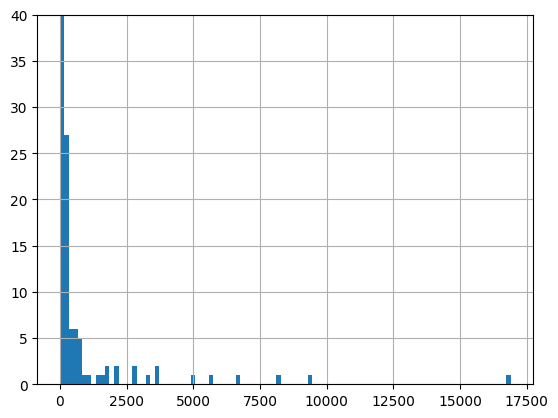

In [4]:
family_counts = df['family'].value_counts()

# Filter the families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

family_counts.hist(bins=100)
plt.ylim(0, 40)

In [16]:
df

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash
...,...,...,...,...,...,...,...,...
104365,6563a2f13624482ac9d32f90,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,{'ssdeep': '24576:OD46fWg3rOqkdvJ7jXLq7+aywR+r...,sdhash hash,{'tlsh': 'T1C64523683D62D4F0C4EF523C29FA7B2C76...,Machoc hash
104366,6563a2f13624482ac9d32f91,zxShell,e416ad91acbc386bf67dc551fb36b9d95a195d8b656cfe...,581536,{'ssdeep': '12288:1wHoMbN76R+m/ZZsJsjLa7pxIkmV...,sdhash hash,{'tlsh': 'T178C423AB070915FBE54ADC3C005752E41C...,Machoc hash
104367,6563a2f13624482ac9d32f92,zxShell,ef049339f1eb091cda335b51939f91e784e1ab1e006056...,1678576,{'ssdeep': '24576:nUtLEVCXBJFlUXYuJmQsYsECO0Gw...,sdhash hash,{'tlsh': 'T1807533E66396CC60DFAAC4B2AF8F4266DB...,Machoc hash
104368,6563a2f13624482ac9d32f93,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,{'ssdeep': '24576:hlIE5fsyVqdxskKfia9TQyaM9rrI...,sdhash hash,{'tlsh': 'T1067533C5AA1F6183EFCB443A57759E3AF7...,Machoc hash


In [17]:
original_count = df.shape[0]

# Count the occurrences of each family
family_counts = df['family'].value_counts()

# Filter the DataFrame to keep families with more than one entry
malware_filtered = df[df['family'].map(family_counts) > 1]

# Get the new number of rows after filtering
filtered_count = malware_filtered.shape[0]

# Identify the families that were removed
removed_families = family_counts[family_counts == 1].index.tolist()

# Print the results
print(f"Original DataFrame had {original_count} rows.")
print(f"Filtered DataFrame has {filtered_count} rows.")
print(f"Families removed (only had 1 entry): {removed_families}")

Original DataFrame had 104370 rows.
Filtered DataFrame has 104260 rows.
Families removed (only had 1 entry): ['Cryxos', 'CABless-40444', 'Amadey', 'Gopuram', 'GoSearch', 'WhiteBlackCrypt', 'OriginLogger', 'Android.Sharkbot', 'CaddyWiper', 'Coper', 'WagnerWiper', 'GwisinLocker', 'GoodwillRansomware', 'DeadBoltRansomware', 'CuratorRansomware', 'HaronRansomware', 'VMProtect', 'Cova', 'ViperSoftX', 'AzovRansomware', 'RhadamanthysLoader', 'Hydra', 'DarkWatchmanRAT', 'VBCrypt', 'NvRendererMiner', 'CerberRansomware', 'GodFather', 'Nukesped', 'RedCap', 'DTrack', 'Pymafka', 'EchelonStealer', 'DiscordRAT', 'Enigma', 'Escobar', 'AcidRain', 'EvilQuest', 'Zanubis', 'PoweRAT', 'Exmatter', 'ClipBanker', 'PlatinumGroup', 'FastViewer', 'Conficker', 'FBIOperationDuckHunt', 'Ousaban', 'AppleSeed', 'Flashback', 'Oski', 'XFilesStealer', 'Oscorp', 'CertiShell', 'Gh0stRAT', 'GigabudRAT', 'Industroyer', 'IssacWiper', 'IRATA', 'MeowRansomware', 'Babadeda', 'NeutrinoEK', 'Strab', 'MacOS.Coldroot', 'Stealc', 'Ma

In [18]:
malware_filtered

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash
...,...,...,...,...,...,...,...,...
104365,6563a2f13624482ac9d32f90,zxShell,e2d2761fc2535d99527df2f7cffd8dddccd504dc0096f6...,1181088,{'ssdeep': '24576:OD46fWg3rOqkdvJ7jXLq7+aywR+r...,sdhash hash,{'tlsh': 'T1C64523683D62D4F0C4EF523C29FA7B2C76...,Machoc hash
104366,6563a2f13624482ac9d32f91,zxShell,e416ad91acbc386bf67dc551fb36b9d95a195d8b656cfe...,581536,{'ssdeep': '12288:1wHoMbN76R+m/ZZsJsjLa7pxIkmV...,sdhash hash,{'tlsh': 'T178C423AB070915FBE54ADC3C005752E41C...,Machoc hash
104367,6563a2f13624482ac9d32f92,zxShell,ef049339f1eb091cda335b51939f91e784e1ab1e006056...,1678576,{'ssdeep': '24576:nUtLEVCXBJFlUXYuJmQsYsECO0Gw...,sdhash hash,{'tlsh': 'T1807533E66396CC60DFAAC4B2AF8F4266DB...,Machoc hash
104368,6563a2f13624482ac9d32f93,zxShell,fbe294910ef833e1c9b2c8663c06b6ef99c13b2bc5eb01...,1698208,{'ssdeep': '24576:hlIE5fsyVqdxskKfia9TQyaM9rrI...,sdhash hash,{'tlsh': 'T1067533C5AA1F6183EFCB443A57759E3AF7...,Machoc hash


In [19]:
malware_filtered["scicore"] = False
size = malware_filtered.shape[0] / 10
scicore = pd.DataFrame(list(db["scicore"].aggregate([{"$sample": {"size": size}}])))
scicore["scicore"] = True

malware_concat = pd.concat([malware_filtered, scicore])

malware_concat

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,{'tlsh': 'T18A635B27E9548473CDC24DB044E80B7B8A...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,{'tlsh': 'T1D9937B107682C275D47A29344C69CB731B...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,{'tlsh': 'T14217331276D2C037C1A711719A37EB29AA...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,{'tlsh': 'T192D6336519E01E8CF2D177765AB1A2D44F...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,{'tlsh': 'T16827339FB8735437E78CE4F089FA77F202...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,966,OpenMalaria,8441008d8c0d684d126dbba66414a08ecd327ceb74ebc0...,7836904,{'ssdeep': '49152:LNooUQtClhnpS0KqIkhCmlxYU6/m...,sdhash hash,{'tlsh': 'T100868D27F587E97CCCCCB7B61A1F3122A6...,Machoc hash,True
1986,1375,Tensorflow,be700cdbb37cbd3ab68a1199ef12818c608d6d01b9ea72...,257,{'ssdeep': '6:B5SKL+I0VceLG58aMtlAy0VAyb0XlxxF...,sdhash hash,{'tlsh': 'T1D9D097129291D8808FD3C2CE6292687033...,Machoc hash,True
1987,866,Mothur,57fba7c87f5debb6b6035a79938d805c707afb79714511...,15982016,{'ssdeep': '393216:lV++qhJt7ebKBcT4yh+Fnc+OKxS...,sdhash hash,{'tlsh': 'T1A4F6174BD9919CADC1D1E77443D7A656E5...,Machoc hash,True
1988,1560,numba,8b71f78203a1f0c57f9e85dc33c143347e16ace7013806...,191,{'ssdeep': '3:TKQWaHMPAtcLaMIwlA06MRm6NKXRPKcM...,sdhash hash,{'tlsh': 'T170C02212091671801EE6CE8C0098C22043...,Machoc hash,True


In [20]:
a = malware_concat
# noinspection PyPackageRequirements
a['tlsh'] = a['tlsh'].apply(lambda x: x['tlsh'] if 'tlsh' in x and isinstance(x, dict) else x)
a

,_id,family,SHA256,file_size,ssdeep,sdhash,tlsh,machoc,scicore
0,6563776f3624482ac9d197e3,9002Rat,006c74c6813a6efeabea860b2718ed548eed216a319d76...,66888,{'ssdeep': '1536:fyOinfXrmThthYvYh+8+IXbTyllRb...,sdhash hash,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,Machoc hash,False
1,6563776f3624482ac9d197e4,9002Rat,0414ffdf9dcf32061cc57d0b54bf4410c1c588258c1261...,91136,{'ssdeep': '1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6...,sdhash hash,T1D9937B107682C275D47A29344C69CB731BBE7E529AF4...,Machoc hash,False
2,6563776f3624482ac9d197e5,9002Rat,054ac444bb2e4fa836ecb6ecdbb9381001ab26cf109451...,20008392,{'ssdeep': '393216:1ZZNprQxrpbXZRCb0g/6cGx3PjW...,sdhash hash,T14217331276D2C037C1A711719A37EB29AAF2B0305734...,Machoc hash,False
3,6563776f3624482ac9d197e6,9002Rat,06fb64ebe50ee96901a339a7c5f686ead86e2ed6b26a73...,13189815,{'ssdeep': '393216:z0ZCif89tnKfsp09SskycXZBBLW...,sdhash hash,T192D6336519E01E8CF2D177765AB1A2D44F79FF168B43...,Machoc hash,False
4,6563776f3624482ac9d197e7,9002Rat,07da10375b0862760f3cb84e563f74ff4fc53864e34836...,21415252,{'ssdeep': '393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO...,sdhash hash,T16827339FB8735437E78CE4F089FA77F202ED9DB5B854...,Machoc hash,False
...,...,...,...,...,...,...,...,...,...
1985,966,OpenMalaria,8441008d8c0d684d126dbba66414a08ecd327ceb74ebc0...,7836904,{'ssdeep': '49152:LNooUQtClhnpS0KqIkhCmlxYU6/m...,sdhash hash,T100868D27F587E97CCCCCB7B61A1F3122A6F47E3949B0...,Machoc hash,True
1986,1375,Tensorflow,be700cdbb37cbd3ab68a1199ef12818c608d6d01b9ea72...,257,{'ssdeep': '6:B5SKL+I0VceLG58aMtlAy0VAyb0XlxxF...,sdhash hash,T1D9D097129291D8808FD3C2CE6292687033AF7573BE00...,Machoc hash,True
1987,866,Mothur,57fba7c87f5debb6b6035a79938d805c707afb79714511...,15982016,{'ssdeep': '393216:lV++qhJt7ebKBcT4yh+Fnc+OKxS...,sdhash hash,T1A4F6174BD9919CADC1D1E77443D7A656E5A0B83DA830...,Machoc hash,True
1988,1560,numba,8b71f78203a1f0c57f9e85dc33c143347e16ace7013806...,191,{'ssdeep': '3:TKQWaHMPAtcLaMIwlA06MRm6NKXRPKcM...,sdhash hash,T170C02212091671801EE6CE8C0098C22043F5212E2E89...,Machoc hash,True


In [21]:

filtered_df = a[a['tlsh'] != 'TNULL']



In [22]:
b = a[['family', 'scicore', 'tlsh']]
len(b[b['tlsh'] == 'TNULL'])

19

In [23]:
import pandas as pd
from itertools import combinations
import tlsh

def tlsh_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = tlsh.diff(row1.tlsh, row2.tlsh)
                results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.tlsh, row2.tlsh, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results

    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'TLSH 1', 'TLSH 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_df = tlsh_comb_chunked(filtered_df, chunk_size=100)
results_df

,Family 1,Family 2,Scicore 1,Scicore 2,TLSH 1,TLSH 2,Diff Score
0,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T1D9937B107682C275D47A29344C69CB731BBE7E529AF4...,175
1,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T14217331276D2C037C1A711719A37EB29AAF2B0305734...,944
2,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T192D6336519E01E8CF2D177765AB1A2D44F79FF168B43...,962
3,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T16827339FB8735437E78CE4F089FA77F202ED9DB5B854...,977
4,9002Rat,9002Rat,False,False,T18A635B27E9548473CDC24DB044E80B7B8A77B6B00765...,T10C37332826D44975CFFA6172FA5B10AC3200F4F5ED0A...,1038
...,...,...,...,...,...,...,...
5257360,Tensorflow,numba,True,True,T1D9D097129291D8808FD3C2CE6292687033AF7573BE00...,T170C02212091671801EE6CE8C0098C22043F5212E2E89...,273
5257361,Tensorflow,cjarchiver,True,True,T1D9D097129291D8808FD3C2CE6292687033AF7573BE00...,T162122293B9AF2D22330B14541902D5D49218A3AB4F1C...,596
5257362,Mothur,numba,True,True,T1A4F6174BD9919CADC1D1E77443D7A656E5A0B83DA830...,T170C02212091671801EE6CE8C0098C22043F5212E2E89...,1451
5257363,Mothur,cjarchiver,True,True,T1A4F6174BD9919CADC1D1E77443D7A656E5A0B83DA830...,T162122293B9AF2D22330B14541902D5D49218A3AB4F1C...,1188


In [24]:

p = results_df.loc[results_df.groupby("TLSH 1")["Diff Score"].idxmin()]

p = p[p["Scicore 2"] != True]

(p["Family 1"] == p["Family 2"]).sum() / p.shape[0]

0.9839801648401413

In [25]:
def tlsh_thresh(s):
    s = s.loc[results_df.groupby("TLSH 1")["Diff Score"].idxmin()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 2"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,500,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] < i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] >= i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = tlsh_thresh(tlsh_comb_chunked(filtered_df, chunk_size=100))
p

,threshold,true_positive_rate,false_positive_rate
0,0.0,0.000000,0.000000
1,1.0,0.252986,0.168269
2,2.0,0.861876,0.184834
3,3.0,0.891397,0.195122
4,4.0,0.908854,0.201970
...,...,...,...
495,495.0,0.999573,1.000000
496,496.0,0.999573,1.000000
497,497.0,0.999573,1.000000
498,498.0,0.999573,1.000000


In [26]:
print(f'The optimal Threshold is: {(p["true_positive_rate"] - p["false_positive_rate"]).abs().idxmax()}')

The optimal Threshold is: 12


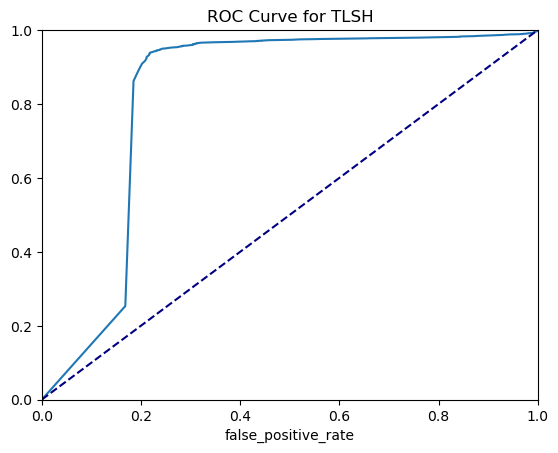

In [27]:
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for TLSH", legend=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [28]:
def ssdeep_comb_chunked(df, chunk_size=100):
    # Function to process a chunk of combinations
    def process_chunk_ssdeep(chunk):
        results = []
        for row1, row2 in combinations(chunk.itertuples(index=False), 2):
            try:
                diff_score = ssdeep.compare(row1.ssdeep, row2.ssdeep)
                results.append((row1.family, row2.family, row1.scicore, row2.scicore, row1.ssdeep, row2.ssdeep, diff_score))
            except Exception as e:
                print(f"Error processing row: {e}")
                continue
        return results
    df['ssdeep'] = df['ssdeep'].apply(lambda x: x['ssdeep'] if 'ssdeep' in x and isinstance(x, dict) else x)
    # Initialize an empty list to store all results
    all_results = []

    # Iterate over the DataFrame in chunks
    for start in range(0, len(df), chunk_size):
        end = start + chunk_size
        chunk = df.iloc[start:end]
        all_results.extend(process_chunk_ssdeep(chunk))

    # Convert all results to DataFrame
    results_df = pd.DataFrame(all_results, columns=['Family 1', 'Family 2', 'Scicore 1', 'Scicore 2', 'ssdeep 1', 'ssdeep 2', 'Diff Score'])

    return results_df

# Usage
# Replace 'your_dataframe' with your actual DataFrame variable
results_df = ssdeep_comb_chunked(malware_concat, chunk_size=100)
results_df

,Family 1,Family 2,Scicore 1,Scicore 2,ssdeep 1,ssdeep 2,Diff Score
0,9002Rat,9002Rat,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,1536:isQQjCC6ZRC5EPviVkdsayrPJe7P6ffTiwi:isQQj...,0
1,9002Rat,9002Rat,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:1ZZNprQxrpbXZRCb0g/6cGx3PjWrIMhGbEV18I+...,0
2,9002Rat,9002Rat,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:z0ZCif89tnKfsp09SskycXZBBLWNcQxvl6lk:aP...,0
3,9002Rat,9002Rat,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:c5gt4ljF2jF0C0eUkGz2Wqha9zO/EEw6iwlmXhg...,0
4,9002Rat,9002Rat,False,False,1536:fyOinfXrmThthYvYh+8+IXbTyllRbRURhj5Q:knfX...,393216:buyeOSYAWkyoxbMn8lGjkhu2coAr2ta/D9L3C+s...,0
...,...,...,...,...,...,...,...
5258120,Tensorflow,numba,True,True,6:B5SKL+I0VceLG58aMtlAy0VAyb0XlxxFAjaj+iQDFOLa...,3:TKQWaHMPAtcLaMIwlA06MRm6NKXRPKcMLgDW/w9nHRz1...,0
5258121,Tensorflow,cjarchiver,True,True,6:B5SKL+I0VceLG58aMtlAy0VAyb0XlxxFAjaj+iQDFOLa...,192:CAxD1IbY2LM0Qd4MQeOBpe44BxBsBI/ZcsKlKP1etg...,0
5258122,Mothur,numba,True,True,393216:lV++qhJt7ebKBcT4yh+Fnc+OKxSpMW1DGVzpx/u...,3:TKQWaHMPAtcLaMIwlA06MRm6NKXRPKcMLgDW/w9nHRz1...,0
5258123,Mothur,cjarchiver,True,True,393216:lV++qhJt7ebKBcT4yh+Fnc+OKxSpMW1DGVzpx/u...,192:CAxD1IbY2LM0Qd4MQeOBpe44BxBsBI/ZcsKlKP1etg...,0


In [29]:
s = results_df.loc[results_df.groupby('ssdeep 1')["Diff Score"].idxmax()]
size = s.shape[0]
s = s[s["Scicore 2"] == False]
s = s[s["Diff Score"] > 0]
(s["Family 1"] == s["Family 2"]).sum() / size

0.49934294000362517

In [ ]:
def ssdeep_thresh(s):
    s = s.loc[results_df.groupby('ssdeep 1')["Diff Score"].idxmax()]
    ssdeep_th = pd.DataFrame(columns=["threshold", "true_positive_rate", "false_positive_rate"])
    comp_to_sci = s[s["Scicore 2"] == False]
    compt_to_malware = s[s["Scicore 2"] == True]
    for i in range (0,110,1):
        
        sci_th = comp_to_sci[comp_to_sci["Diff Score"] >= i]
        mal_th = compt_to_malware[compt_to_malware["Diff Score"] > i]
        f_th = compt_to_malware[compt_to_malware["Diff Score"] < i]
        
        TP = (sci_th["Family 1"] == sci_th["Family 2"]).sum()
        FP = (sci_th["Family 1"] != sci_th["Family 2"]).sum()
        FN = (f_th["Family 1"] != f_th["Family 2"]).sum()
        TN = (f_th["Family 1"] == f_th["Family 2"]).sum()
        
        TPR = TP / (TP + FN) if TP + FN != 0 else 0
        FPR = FP / (FP + TN) if FP + TN != 0 else 0
        # Append results to DataFrame
        ssdeep_th.loc[i] = [i, TPR, FPR]
    return ssdeep_th
p = ssdeep_thresh(ssdeep_comb_chunked(malware_concat, chunk_size=100))
p

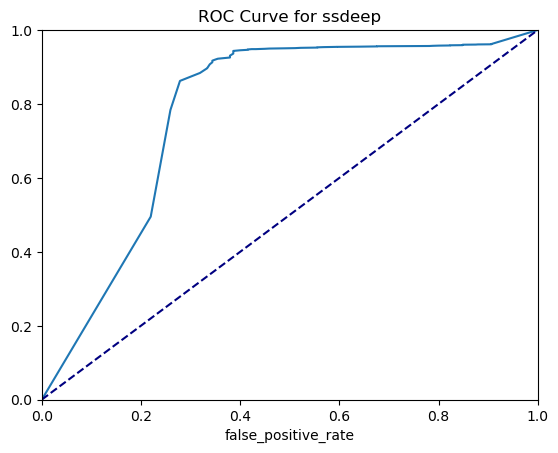

In [31]:
# Plot the ROC curve in range 0.1 to 1.0
p.plot(x="false_positive_rate", y="true_positive_rate", xlim=(0, 1), ylim=(0, 1),title="ROC Curve for ssdeep", legend=False)

# add a dotet line with y = x for comparison
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()